In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,  Ridge, ElasticNet
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
import category_encoders as ce
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress only DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


%matplotlib inline

### Linear regression for datasets containing all the values

In [15]:
#cleaned dataset 

df = pd.read_csv("auto_data_cleaned_16_09_2024.csv")
#My preproprecissing steps
# the models will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['model'])
df['Modell_encoded'] = target_encoder.fit_transform(df['model'], df['price_in_euro'])  # 'Preis' ist die Zielvariable


# the brand will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['brand'])
df['Brand_encoded'] = target_encoder.fit_transform(df['brand'], df['price_in_euro'])  # 'Preis' ist die Zielvariable

df=df.drop(columns=['year', 'offer_description', ])

df = pd.get_dummies(df, columns=[ 'fuel_type', 'transmission_type','color'], dtype='int')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238302 entries, 0 to 238301
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   brand                             238302 non-null  object 
 1   model                             238302 non-null  object 
 2   price_in_euro                     238302 non-null  float64
 3   power_ps                          238302 non-null  float64
 4   fuel_consumption_l_100km          238302 non-null  float64
 5   mileage_in_km                     238302 non-null  float64
 6   age                               238302 non-null  float64
 7   Modell_encoded                    238302 non-null  float64
 8   Brand_encoded                     238302 non-null  float64
 9   fuel_type_CNG                     238302 non-null  int64  
 10  fuel_type_Diesel                  238302 non-null  int64  
 11  fuel_type_Diesel Hybrid           238302 non-null  i

In [16]:
#cleaned dropped dataset
df_drop = pd.read_csv("auto_data_cleaned_drop__15_10_2024.csv")


# the models will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['model'])
df_drop['Modell_encoded'] = target_encoder.fit_transform(df['model'], df['price_in_euro'])  # 'Preis' ist die Zielvariable


# the brand will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['brand'])
df_drop['Brand_encoded'] = target_encoder.fit_transform(df['brand'], df['price_in_euro'])  # 'Preis' ist die Zielvariable

df_drop=df_drop.drop(columns=['year', 'offer_description'])

df_drop = pd.get_dummies(df_drop, columns=[ 'fuel_type', 'transmission_type','color'], dtype='int')
df_drop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213668 entries, 0 to 213667
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   brand                             213668 non-null  object 
 1   model                             213668 non-null  object 
 2   price_in_euro                     213668 non-null  float64
 3   power_ps                          213668 non-null  float64
 4   fuel_consumption_l_100km          213668 non-null  float64
 5   mileage_in_km                     213668 non-null  float64
 6   age                               213668 non-null  float64
 7   Modell_encoded                    213668 non-null  float64
 8   Brand_encoded                     213668 non-null  float64
 9   fuel_type_CNG                     213668 non-null  int64  
 10  fuel_type_Diesel                  213668 non-null  int64  
 11  fuel_type_Diesel Hybrid           213668 non-null  i

### Application of transformations:

In [17]:
#Full dataset
# Apply Square Root Transformation (only for non-negative values)
df['mileage_mileage_in_km'] = np.sqrt(df['mileage_in_km'].clip(lower=0))

# Apply Log Transformation (only for non-negative values)
df['price_in_euro'] = np.log(df['price_in_euro'] + 1)
df['fuel_consumption_l_100km'] = np.log(df['fuel_consumption_l_100km'] + 1)
df['power_ps']=np.log(df['power_ps']+1)
df['age']=np.log(df['age']+1)
df['Brand_encoded']=np.log(df['Brand_encoded']+1)
df['Modell_encoded']=np.log(df['Modell_encoded']+1)

#Droped dataset
# Apply Square Root Transformation (only for non-negative values)
df_drop['mileage_mileage_in_km'] = np.sqrt(df_drop['mileage_in_km'].clip(lower=0))

# Apply Log Transformation (only for non-negative values)
df_drop['price_in_euro'] = np.log(df_drop['price_in_euro'] + 1)
df_drop['fuel_consumption_l_100km'] = np.log(df_drop['fuel_consumption_l_100km'] + 1)
df_drop['power_ps']=np.log(df_drop['power_ps']+1)
df_drop['age']=np.log(df_drop['age']+1)
df_drop['Brand_encoded']=np.log(df_drop['Brand_encoded']+1)
df_drop['Modell_encoded']=np.log(df_drop['Modell_encoded']+1)

In [18]:
# Splitting the full data into training and test sets
X = df.drop(['price_in_euro','model', 'brand'], axis=1)  # Features
y = df['price_in_euro']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the dropped data into training and test sets
X_d = df_drop.drop(['price_in_euro', 'model', 'brand'], axis=1)  # Features
y_d = df_drop['price_in_euro']  # Target variable

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)


In [19]:
lr = LinearRegression(fit_intercept= True)
lr.fit(X_train, y_train)


#  Evaluate the model on the Test Set
y_pred = lr.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test ** 0.5

print(f"Test MAE - full dataset: {test_mae}")
print(f"Test Set MSE - full dataset: {mse_test}")
print(f"Test R² - full dataset: {test_r2}")
print(f"Test RMSE - full dataset: {rmse_test:.2f}")


lr_d = LinearRegression(fit_intercept=False)
lr_d.fit(X_train_d, y_train_d)

#Evaluate th emodel on the Test set
y_pred_d = lr_d.predict(X_test_d)
test_mae_d = mean_absolute_error(y_test_d, y_pred_d)
test_r2_d = r2_score(y_test_d, y_pred_d)
mse_test_d = mean_squared_error(y_test_d, y_pred_d)
rmse_test_d = mse_test_d ** 0.5

print(f"Test MAE - dropped dataset: {test_mae_d}")
print(f"Test Set MSE - dropped dataset: {mse_test_d}")
print(f"Test R² - dropped dataset: {test_r2_d}")
print(f"Test RMSE - dropped dataset: {rmse_test_d:.2f}")

Test MAE - full dataset: 0.21628607116147483
Test Set MSE - full dataset: 0.10649673928657108
Test R² - full dataset: 0.853897820636808
Test RMSE - full dataset: 0.33
Test MAE - dropped dataset: 0.24582447439146896
Test Set MSE - dropped dataset: 0.13081727890640885
Test R² - dropped dataset: 0.8196450380324334
Test RMSE - dropped dataset: 0.36


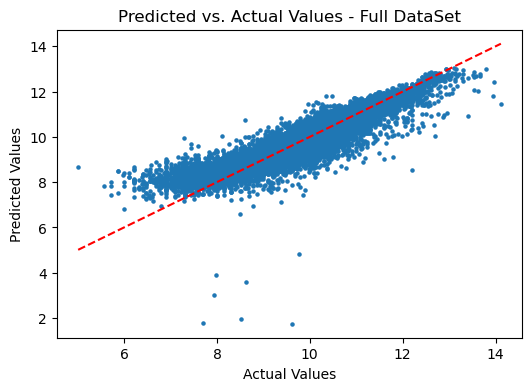

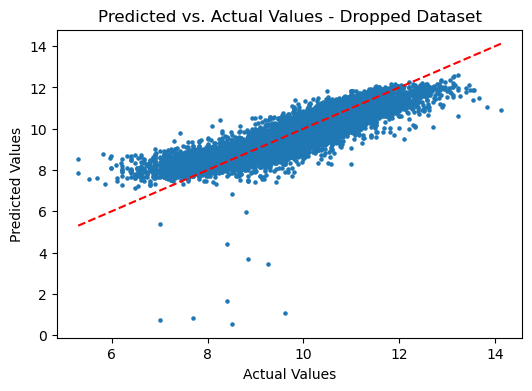

In [20]:


# Plot Predicted vs. Actual Values
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, s=5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values - Full DataSet')
plt.show()

# Plot Predicted vs. Actual Values
plt.figure(figsize=(6,4))
plt.scatter(y_test_d, y_pred_d, s=5)
plt.plot([min(y_test_d), max(y_test_d)], [min(y_test_d), max(y_test_d)], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values - Dropped Dataset')
plt.show()


### Invert the values back to real prices:

In [21]:
# Inverse log transformation on both actual and predicted values
y_test_inv = np.expm1(y_test)  # Use expm1 for e^x - 1
y_pred_inv = np.expm1(y_pred)  # Same inverse for predictions

# Calculate metrics on the original scale
mse_test_2 = mean_squared_error(y_test_inv, y_pred_inv)
mae_test_2 = mean_absolute_error(y_test_inv, y_pred_inv)
r2_test_2 = r2_score(y_test_inv, y_pred_inv)

print(f"Test Set MSE: {mse_test_2}")
print(f"Test Set MAE: {mae_test_2}")
print(f"Test Set R²: {r2_test_2}")


# Inverse log transformation on both actual and predicted values
y_test_inv_d = np.expm1(y_test_d)  # Use expm1 for e^x - 1
y_pred_inv_d = np.expm1(y_pred_d)  # Same inverse for predictions

# Calculate metrics on the original scale
mse_test_2_d = mean_squared_error(y_test_inv_d, y_pred_inv_d)
mae_test_2_d = mean_absolute_error(y_test_inv_d, y_pred_inv_d)
r2_test_2_d = r2_score(y_test_inv_d, y_pred_inv_d)

print(f"Test Set MSE: {mse_test_2_d}")
print(f"Test Set MAE: {mae_test_2_d}")
print(f"Test Set R²: {r2_test_2_d}")



Test Set MSE: 287308947.6623095
Test Set MAE: 5284.762393454507
Test Set R²: 0.7463799779021103
Test Set MSE: 421005152.59204686
Test Set MAE: 6397.820501478684
Test Set R²: 0.5677597714881855


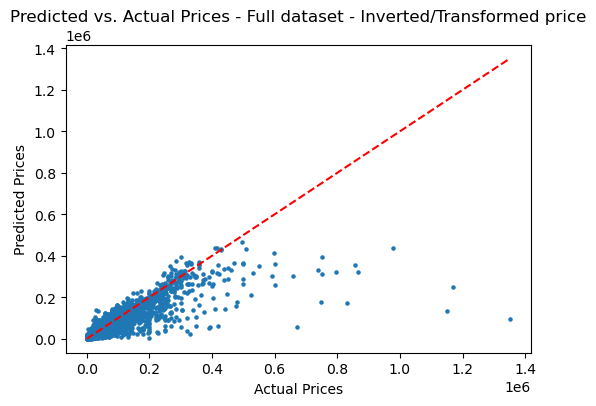

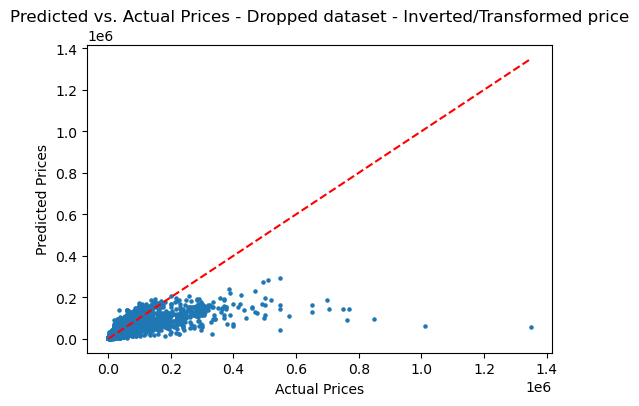

In [22]:
# Plot Predicted vs. Actual Values
plt.figure(figsize=(6,4))
plt.scatter(y_test_inv, y_pred_inv, s=5)  # Correctly plot inverse transformed values
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices - Full dataset - Inverted/Transformed price')
plt.show()

# Plot Predicted vs. Actual Values
plt.figure(figsize=(6,4))
plt.scatter(y_test_inv_d, y_pred_inv_d, s=5)  # Correctly plot inverse transformed values
plt.plot([min(y_test_inv_d), max(y_test_inv_d)], [min(y_test_inv_d), max(y_test_inv_d)], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices - Dropped dataset - Inverted/Transformed price')
plt.show()

## This result is not particularly nice, and this could be explained by not-linear character of price variable on high values. Let's test the same on the dataset without the extreme values. 

In [17]:
#cleaned dataset
df = pd.read_csv("auto_data_cleaned_16_09_2024.csv")

# the models will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['model'])
df['Modell_encoded'] = target_encoder.fit_transform(df['model'], df['price_in_euro'])  # 'Preis' ist die Zielvariable


# the brand will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['brand'])
df['Brand_encoded'] = target_encoder.fit_transform(df['brand'], df['price_in_euro'])  # 'Preis' ist die Zielvariable

df=df.drop(columns=['year', 'offer_description', ])

df = pd.get_dummies(df, columns=[ 'fuel_type', 'transmission_type','color'], dtype='int')

# Remove the outliers
df_clean = df[(np.abs(stats.zscore(df['price_in_euro'])) < 5)]  # 5 is the higer threshold for extreme values
df_clean = df_clean[(np.abs(stats.zscore(df_clean['mileage_in_km'])) < 4)]  # Do the same for mileage



In [3]:
#price range would be
df_clean['price_in_euro'].describe()

count    236366.000000
mean      23854.440076
std       20709.350029
min         120.000000
25%       11850.000000
50%       19440.000000
75%       29207.500000
max      206950.000000
Name: price_in_euro, dtype: float64

In [4]:
#cleaned dropped dataset
df_drop = pd.read_csv("auto_data_cleaned_drop__15_10_2024.csv")


# the models will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['model'])
df_drop['Modell_encoded'] = target_encoder.fit_transform(df['model'], df['price_in_euro'])  # 'Preis' ist die Zielvariable

# the brand will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['brand'])
df_drop['Brand_encoded'] = target_encoder.fit_transform(df['brand'], df['price_in_euro'])  # 'Preis' ist die Zielvariable


df_drop=df_drop.drop(columns=['year', 'offer_description'])
df_drop = pd.get_dummies(df_drop, columns=[ 'fuel_type', 'transmission_type','color'], dtype='int')

# Remove the outliers
df_clean_d = df_drop[(np.abs(stats.zscore(df_drop['price_in_euro'])) < 5)]  # 4 is the higer threshold for outliers
df_clean_d = df_clean_d[(np.abs(stats.zscore(df_clean_d['mileage_in_km'])) <4 )]  # Do the same for mileage



In [5]:
#price range would be
df_clean_d['price_in_euro'].describe()

count    212133.000000
mean      23284.787911
std       20285.799314
min         120.000000
25%       11340.000000
50%       18940.000000
75%       28699.000000
max      199999.000000
Name: price_in_euro, dtype: float64

In [6]:
#Full dataset
# Apply Square Root Transformation (only for non-negative values)
df_clean['mileage_mileage_in_km'] = np.sqrt(df_clean['mileage_in_km'].clip(lower=0))

# Apply Log Transformation (only for non-negative values)
df_clean['price_in_euro'] = np.log(df_clean['price_in_euro'] + 1)
df_clean['fuel_consumption_l_100km'] = np.log(df_clean['fuel_consumption_l_100km'] + 1)
df_clean['power_ps']=np.log(df_clean['power_ps']+1)
df_clean['age']=np.log(df_clean['age']+1)
df_clean['Brand_encoded']=np.log(df_clean['Brand_encoded']+1)
df_clean['Modell_encoded']=np.log(df_clean['Modell_encoded']+1)

#Droped dataset
# Apply Square Root Transformation (only for non-negative values)
df_clean_d['mileage_mileage_in_km'] = np.sqrt(df_clean_d['mileage_in_km'].clip(lower=0))

# Apply Log Transformation (only for non-negative values)
df_clean_d['price_in_euro'] = np.log(df_clean_d['price_in_euro'] + 1)
df_clean_d['fuel_consumption_l_100km'] = np.log(df_clean_d['fuel_consumption_l_100km'] + 1)
df_clean_d['power_ps']=np.log(df_clean_d['power_ps']+1)
df_clean_d['age']=np.log(df_clean_d['age']+1)
df_clean_d['Brand_encoded']=np.log(df_clean_d['Brand_encoded']+1)
df_clean_d['Modell_encoded']=np.log(df_clean_d['Modell_encoded']+1)

In [7]:
# Splitting the full data into training and test sets
X = df_clean.drop(['price_in_euro','model', 'brand'], axis=1)  # Features
y = df_clean['price_in_euro']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the dropped data into training and test sets
X_d = df_clean_d.drop(['price_in_euro', 'model', 'brand'], axis=1)  # Features
y_d = df_clean_d['price_in_euro']  # Target variable

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)


In [8]:
lr = LinearRegression(fit_intercept= True)
lr.fit(X_train, y_train)


#  Evaluate the model on the Test Set
y_pred = lr.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test ** 0.5

print(f"Test MAE - full dataset: {test_mae}")
print(f"Test Set MSE - full dataset: {mse_test}")
print(f"Test R² - full dataset: {test_r2}")
print(f"Test RMSE - full dataset: {rmse_test:.2f}")


lr_d = LinearRegression(fit_intercept=False)
lr_d.fit(X_train_d, y_train_d)

#Evaluate th emodel on the Test set
y_pred_d = lr_d.predict(X_test_d)
test_mae_d = mean_absolute_error(y_test_d, y_pred_d)
test_r2_d = r2_score(y_test_d, y_pred_d)
mse_test_d = mean_squared_error(y_test_d, y_pred_d)
rmse_test_d = mse_test_d ** 0.5

print(f"Test MAE - dropped dataset: {test_mae_d}")
print(f"Test Set MSE - dropped dataset: {mse_test_d}")
print(f"Test R² - dropped dataset: {test_r2_d}")
print(f"Test RMSE - dropped dataset: {rmse_test_d:.2f}")

Test MAE - full dataset: 0.2073347333317084
Test Set MSE - full dataset: 0.09414149182495397
Test R² - full dataset: 0.8614428154945541
Test RMSE - full dataset: 0.31
Test MAE - dropped dataset: 0.2316228675929954
Test Set MSE - dropped dataset: 0.110995357674504
Test R² - dropped dataset: 0.8371560253045174
Test RMSE - dropped dataset: 0.33


### Invertion of the prices back:

In [9]:
# Inverse log transformation on both actual and predicted values
y_test_inv = np.expm1(y_test)  # Use expm1 for e^x - 1
y_pred_inv = np.expm1(y_pred)  # Same inverse for predictions

# Calculate metrics on the original scale
mse_test_2 = mean_squared_error(y_test_inv, y_pred_inv)
mae_test_2 = mean_absolute_error(y_test_inv, y_pred_inv)
r2_test_2 = r2_score(y_test_inv, y_pred_inv)

print(f"Test Set MSE: {mse_test_2}")
print(f"Test Set MAE: {mae_test_2}")
print(f"Test Set R²: {r2_test_2}")


# Inverse log transformation on both actual and predicted values
y_test_inv_d = np.expm1(y_test_d)  # Use expm1 for e^x - 1
y_pred_inv_d = np.expm1(y_pred_d)  # Same inverse for predictions

# Calculate metrics on the original scale
mse_test_2_d = mean_squared_error(y_test_inv_d, y_pred_inv_d)
mae_test_2_d = mean_absolute_error(y_test_inv_d, y_pred_inv_d)
r2_test_2_d = r2_score(y_test_inv_d, y_pred_inv_d)

print(f"Test Set MSE: {mse_test_2_d}")
print(f"Test Set MAE: {mae_test_2_d}")
print(f"Test Set R²: {r2_test_2_d}")


Test Set MSE: 76914723.76044098
Test Set MAE: 4510.105229786508
Test Set R²: 0.8194814693219604
Test Set MSE: 108989427.21514311
Test Set MAE: 5171.966919942303
Test Set R²: 0.7299882029263558


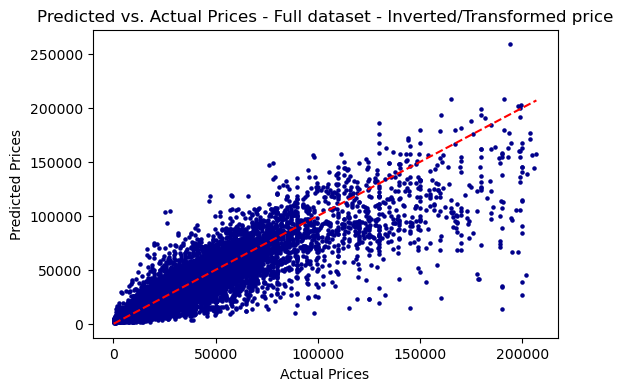

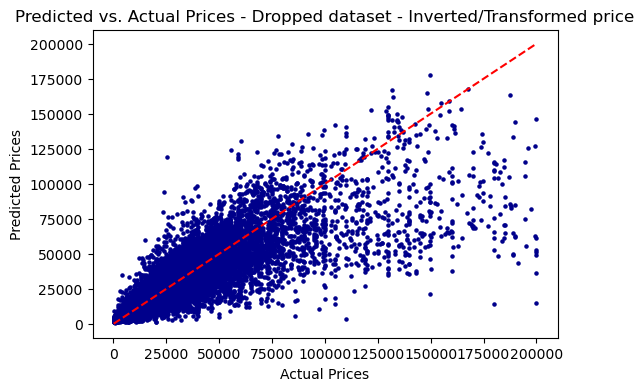

In [10]:
# Plot Predicted vs. Actual Values
plt.figure(figsize=(6,4))
plt.scatter(y_test_inv, y_pred_inv, s=5, color='darkblue')  # Correctly plot inverse transformed values
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices - Full dataset - Inverted/Transformed price')
plt.show()

# Plot Predicted vs. Actual Values
plt.figure(figsize=(6,4))
plt.scatter(y_test_inv_d, y_pred_inv_d, s=5, color='darkblue')  # Correctly plot inverse transformed values
plt.plot([min(y_test_inv_d), max(y_test_inv_d)], [min(y_test_inv_d), max(y_test_inv_d)], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices - Dropped dataset - Inverted/Transformed price')
plt.show()

### What these results mean:
MAE of 3,700 Euro is fairly high, depending on the context of the data (e.g., if typical prices are in the range of tens of thousands, this might be acceptable, but if prices are around 10,000–20,000 Euro, it may be quite high).
MSE being in the range of millions suggests that the squared differences between predicted and actual values are significant, likely due to large outliers or variability in the dataset.
R² of 0.78 indicates a rather strong model fit for a linear regression model, which generally means my model is capturing most of the relationships between features and price, though there's room for improvement.

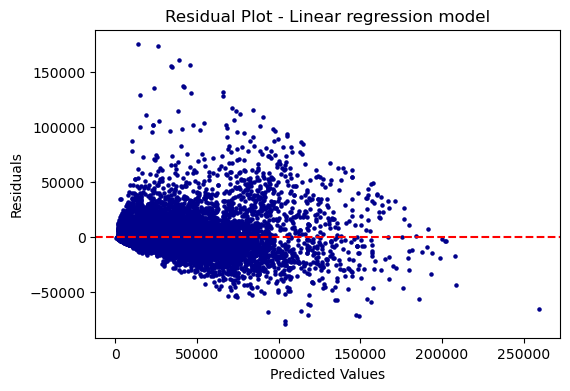

In [19]:
# Plot Residuals
residuals = y_test_inv - y_pred_inv
plt.figure(figsize=(6,4))
plt.scatter(y_pred_inv, residuals, s = 5, color='darkblue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Linear regression model')
plt.show()

### Trying to fine-tune the model:

In [86]:
#  Define the model
model = LinearRegression()

# Define the parameter grid (for Linear Regression, not many parameters but you can include others)
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-10, -5, -1, 1, 5,7, 10],
    'positive':[True, False]
}

#  Create a GridSearchCV object with Cross-Validation (e.g., 5-fold CV)
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Choose the scoring metric (MSE in this case)
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1)  # Use all processors

#  Fit the model
grid_search.fit(X_train, y_train)

#  Print the best parameters and corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (neg MSE): ", grid_search.best_score_)

#  Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test Set Mean Squared Error: {mse}")
print(f"Test Set R² Score: {r2}")

Best parameters found:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -10, 'positive': False}
Best cross-validation score (neg MSE):  -0.09336110231264572
Test Set Mean Squared Error: 0.09414149182495397
Test Set R² Score: 0.8614428154945541


In [87]:
# Inverse log transformation on both actual and predicted values
y_test_inv = np.expm1(y_test)  # Use expm1 for e^x - 1
y_pred_inv = np.expm1(y_pred)  # Same inverse for predictions

# Calculate metrics on the original scale
mse_test_2 = mean_squared_error(y_test_inv, y_pred_inv)
mae_test_2 = mean_absolute_error(y_test_inv, y_pred_inv)
r2_test_2 = r2_score(y_test_inv, y_pred_inv)

print(f"Test Set MSE: {mse_test_2}")
print(f"Test Set MAE: {mae_test_2}")
print(f"Test Set R²: {r2_test_2}")


Test Set MSE: 76914723.76044098
Test Set MAE: 4510.105229786508
Test Set R²: 0.8194814693219604


### no improvement

## Lasso Regression (L1 Regularization)
Key Idea: Lasso regression adds a penalty to the absolute sum of the coefficients (L1 norm), which can force some coefficients to be exactly zero. This effectively selects a subset of features, performing feature selection.
Formula: Minimize 
RSS
+
λ
∑
i
=
1
n
∣
β
i
∣
RSS+λ∑ 
i=1
n
​	
 ∣β 
i
​	
 ∣
Here, 
λ
λ controls the strength of the L1 penalty.
Effect: Lasso can shrink some coefficients to exactly zero, effectively removing those features from the model. It's great for simplifying models by selecting only the most important features.
Use: Lasso is useful when you have many irrelevant features and want to automatically select the most important ones.

In [45]:
# Initialize Lasso model
lasso = Lasso()

# Define parameter grid
param_grid = {
    'alpha': [0.0001,0.001, 0.01, 0.1],  # Values of alpha to try
    'max_iter': [1000, 5000, 10000],     # Optional: You can add more parameters
    'tol': [1e-4, 1e-3, 1e-2],           # Optional: Tolerance for stopping criteria
}

# Set up GridSearchCV with cross-validation and MSE scoring
grid_search = GridSearchCV(
    estimator=lasso, 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring=make_scorer(mean_squared_error, greater_is_better=False),  # Use negative MSE for minimization
    n_jobs=-1  # Use all available processors
)


In [46]:
#Fit the model
grid_search.fit(X_train, y_train)

# Step 7: Print the best parameters and corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (neg MSE): ", grid_search.best_score_)

# : Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test Set Mean Squared Error: {mse}")
print(f"Test Set R² Score: {r2}")

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.378e+03, tolerance: 1.005e+01
  model = cd_fast.enet_coordinate_descent(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.257e+03, tolerance: 1.001e+01
  model = cd_fast.enet_coordinate_descent(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

Best parameters found:  {'alpha': 0.0001, 'max_iter': 1000, 'tol': 0.0001}
Best cross-validation score (neg MSE):  -0.0927184881515065
Test Set Mean Squared Error: 0.09332466647887837
Test Set R² Score: 0.860371846808382


/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e+03, tolerance: 1.255e+01
  model = cd_fast.enet_coordinate_descent(


In [47]:
# Inverse log transformation on both actual and predicted values
y_test_inv = np.expm1(y_test)  # Use expm1 for e^x - 1
y_pred_inv = np.expm1(y_pred)  # Same inverse for predictions

# Calculate metrics on the original scale
mse_test_2 = mean_squared_error(y_test_inv, y_pred_inv)
mae_test_2 = mean_absolute_error(y_test_inv, y_pred_inv)
r2_test_2 = r2_score(y_test_inv, y_pred_inv)

print(f"Test Set MSE: {mse_test_2}")
print(f"Test Set MAE: {mae_test_2}")
print(f"Test Set R²: {r2_test_2}")


Test Set MSE: 64949123.28158266
Test Set MAE: 4341.94520179357
Test Set R²: 0.8242695343952242


## Ridge Regression (L2 Regularization)
Key Idea: Ridge regression adds a penalty to the sum of the squared coefficients (L2 norm). It shrinks the coefficients of less important features, but never completely to zero.
Formula: Minimize 
RSS
+
λ
∑
i
=
1
n
β
i
2
RSS+λ∑ 
i=1
n
​	
 β 
i
2
​	
 
RSS
RSS is the residual sum of squares (i.e., regular linear regression loss).
λ
λ controls the strength of the penalty (larger 
λ
λ, more regularization).
Effect: Ridge keeps all features in the model but reduces their influence. It’s useful when you have many features that are correlated.
Use: Ridge is good for reducing model complexity while keeping all features.

In [48]:
ridge=Ridge()

# Define the parameter grid for Ridge regression
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 1000, 10000],  # Regularization strength
    'max_iter': [100, 500, 1000],                   # Number of iterations
    'solver': ['sag', 'lsqr']                       # Solver types that use iterations
}
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',  # Use R² as the scoring metric
    cv=5,          # Number of cross-validation folds
    n_jobs=-1,     # Use all available cores
    verbose=1      # Set to 1 for detailed output
)

# Fit the model
grid_search.fit(X, y)

# : Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/User

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/User

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'alpha': 1.0, 'max_iter': 1000, 'solver': 'sag'}
Best R² Score: 0.3466442918060957


/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [35]:
# Inverse log transformation on both actual and predicted values
y_test_inv = np.expm1(y_test)  # Use expm1 for e^x - 1
y_pred_inv = np.expm1(y_pred)  # Same inverse for predictions

# Calculate metrics on the original scale
mse_test_2 = mean_squared_error(y_test_inv, y_pred_inv)
mae_test_2 = mean_absolute_error(y_test_inv, y_pred_inv)
r2_test_2 = r2_score(y_test_inv, y_pred_inv)

print(f"Test Set MSE: {mse_test_2}")
print(f"Test Set MAE: {mae_test_2}")
print(f"Test Set R²: {r2_test_2}")


Test Set MSE: 83958804.6395177
Test Set MAE: 4681.24862859643
Test Set R²: 0.8157992654779298


## Elastic Net (Combination of L1 and L2 Regularization)
Key Idea: Elastic Net combines both Ridge (L2) and Lasso (L1) penalties. It uses a weighted sum of both regularization terms. This allows for both feature selection (like Lasso) and coefficient shrinking (like Ridge).
Formula: Minimize 
RSS
+
λ
1
∑
i
=
1
n
∣
β
i
∣
+
λ
2
∑
i
=
1
n
β
i
2
RSS+λ 
1
​	
 ∑ 
i=1
n
​	
 ∣β 
i
​	
 ∣+λ 
2
​	
 ∑ 
i=1
n
​	
 β 
i
2
​	
 
λ
1
λ 
1
​	
  controls the L1 penalty, and 
λ
2
λ 
2
​	
  controls the L2 penalty.
Effect: Elastic Net retains the benefits of both Lasso (for feature selection) and Ridge (for handling multicollinearity). It’s more flexible than either of the two methods alone.
Use: Elastic Net is useful when you have highly correlated features, and you want both regularization and feature selection.

Summary of Use Cases:

Ridge: When you have many correlated features and want to reduce their coefficients without removing them.

Lasso:When you want automatic feature selection and some features are irrelevant.

Elastic Net: When you want a balance between Ridge and Lasso, especially in datasets with many features, some of which may be correlated.
Each of these techniques helps to avoid overfitting by controlling the complexity of the model, especially when dealing with high-dimensional data!

In [51]:
# Create a pipeline with scaling and ElasticNet
en=ElasticNet()

# Define the parameter grid for ElasticNet
param_grid = {
    'alpha': np.logspace(-3, 3, 7),  # Alpha values to try
    'l1_ratio': np.linspace(0, 1, 5)  # L1 ratio values (0 = Ridge, 1 = Lasso)
}

# Create GridSearchCV object
grid_search = GridSearchCV(en, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

# Output the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.100e+03, tolerance: 1.176e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.579e+03, tolerance: 1.332e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one o

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.457e+04, tolerance: 1.280e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.302e+04, tolerance: 1.176e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one o

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.963e+04, tolerance: 1.280e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.868e+04, tolerance: 1.260e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one o

Best parameters: {'alpha': 0.01, 'l1_ratio': 0.25}
Best R² score: -0.21110486017778246


In [52]:
# : Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.25}
Best R² Score: -0.21110486017778246


In [53]:
# Inverse log transformation on both actual and predicted values
y_test_inv = np.expm1(y_test)  # Use expm1 for e^x - 1
y_pred_inv = np.expm1(y_pred)  # Same inverse for predictions

# Calculate metrics on the original scale
mse_test_2 = mean_squared_error(y_test_inv, y_pred_inv)
mae_test_2 = mean_absolute_error(y_test_inv, y_pred_inv)
r2_test_2 = r2_score(y_test_inv, y_pred_inv)

print(f"Test Set MSE: {mse_test_2}")
print(f"Test Set MAE: {mae_test_2}")
print(f"Test Set R²: {r2_test_2}")


Test Set MSE: 63545152.54392181
Test Set MAE: 4261.133292112736
Test Set R²: 0.8280682066321838


## Introduction to the Model:
Linear regression is a simple, interpretable model that assumes a linear relationship between the features and the target variable (in this case, price). While it's often a good baseline model, it has limitations in capturing complex patterns in data.

### Explanation of Results:
Performance Metrics: Mention the actual metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² that I've observed.
Example: "The model achieved an MSE of 84,215,391 and an R² score of 0.815, meaning that 81.5% of the variance in the target (price) is explained by the model. However, the high MSE and an MAE of 4,692 suggest that the model’s predictions deviate significantly from the true values, particularly for some instances."

### Limitations of Linear Regression:
    
Linear Assumptions: Linear regression assumes that the relationship between the independent variables (features) and the dependent variable (price) is linear, which might not hold true in complex datasets.
"The linear regression model assumes that the relationship between the features and the target variable is linear. However, in real-world problems like price prediction, the relationship may be non-linear and influenced by complex interactions between features that linear regression cannot capture."

Inability to Handle Non-Linearity: Linear regression struggles when the relationship between the features and the target is not straightforward.
"Price is often influenced by non-linear factors such as age, condition, mileage, or brand, which cannot be adequately captured by a purely linear model."

Impact of Outliers: Linear regression is sensitive to outliers, which can distort the model.
"Linear regression is highly sensitive to outliers, and extreme values in the dataset can skew the results, leading to larger errors in predictions. This could be one reason for the higher-than-expected error metrics."

Multicollinearity: If some of the features are highly correlated with each other, linear regression might not handle them well.
"The presence of multicollinearity among features (e.g., mileage and age of a car) can cause instability in the coefficient estimates, leading to suboptimal performance."

### Let's have a look on a resulting data for this model:

In [11]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Price': y_test_inv,  # Inverse transform y_test for comparison
    'Predicted Price': y_pred_inv,
    'Residuals':y_pred_inv-y_test_inv,
    'Abs_residuals':abs(y_pred_inv-y_test_inv),
    'Modell_encoded': X_test['Modell_encoded'],
    'Year': 2024-np.expm1(X_test['age']),
    'Power':np.expm1(X_test['power_ps'])
    
})

# Step 5: Extract the original 'model' names from the original df
models_df = df_clean[['Modell_encoded', 'model']].drop_duplicates()  # Ensure unique Modell_encoded values

# Merge the comparison DataFrame with models_df based on 'Modell_encoded'
final_comparison_df = pd.merge(comparison_df, models_df, on='Modell_encoded', how='left')


In [12]:
final_comparison_df

,Actual Price,Predicted Price,Residuals,Abs_residuals,Modell_encoded,Year,Power,model
0,47990.0,34478.601412,-13511.398588,13511.398588,10.173946,2021.0,200.0,Peugeot 508
1,12999.0,12903.994202,-95.005798,95.005798,9.531071,2015.0,132.0,Toyota Auris
2,28940.0,25287.635736,-3652.364264,3652.364264,10.231388,2021.0,122.0,Toyota Corolla
3,11870.0,8385.519322,-3484.480678,3484.480678,9.114380,2017.0,69.0,Citroen C1
4,8000.0,8724.687809,724.687809,724.687809,9.470520,2011.0,105.0,Alfa Romeo Giulietta
...,...,...,...,...,...,...,...,...
47273,32380.0,33802.837297,1422.837297,1422.837297,9.940437,2022.0,122.0,Volkswagen Caddy
47274,29490.0,36657.417421,7167.417421,7167.417421,10.239262,2022.0,150.0,SEAT Ateca
47275,17490.0,12474.274572,-5015.725428,5015.725428,9.307559,2018.0,101.0,Ford C-Max
47276,53990.0,51818.468708,-2171.531292,2171.531292,10.516170,2022.0,177.0,Toyota Proace


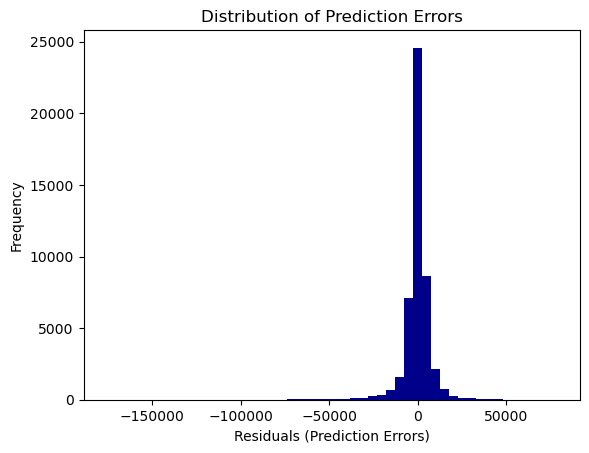

In [14]:
# Plot histogram of residuals
plt.hist(final_comparison_df['Residuals'], bins=50, color='darkblue')
plt.xlabel('Residuals (Prediction Errors)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

### Analysis of outliers in prediction errors:

In [15]:
outlier_threshold = 2.5 * np.std(final_comparison_df['Residuals'])  # Set a threshold for residuals
outliers = final_comparison_df[abs(final_comparison_df['Residuals']) > outlier_threshold]
outliers.shape

(1271, 8)

  price_range  count
0        >50k    926
1     40k-50k    132
2     30k-40k    116
3     20k-30k     56
4     10k-20k     32
5        <10k      9


/var/folders/bg/6h6fxpzx7_v6jgvd0c31r_7m0000gn/T/ipykernel_42823/1195400347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['price_range'] = pd.cut(outliers['Actual Price'], bins=bins, labels=labels)


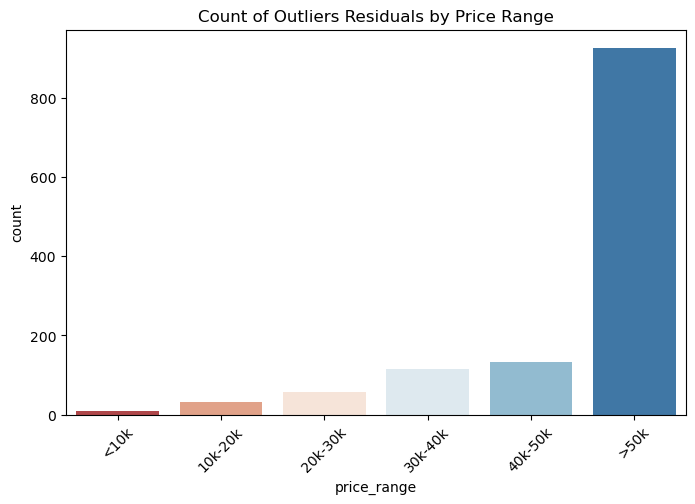

In [16]:
# Define price bins
bins = [0, 10000, 20000, 30000, 40000, 50000, float('inf')]
labels = ['<10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '>50k']

# Create a new column for price ranges
outliers['price_range'] = pd.cut(outliers['Actual Price'], bins=bins, labels=labels)

# Group by price range
price_range_distribution = outliers['price_range'].value_counts().reset_index()
price_range_distribution.columns = ['price_range', 'count']

# Display the distribution
print(price_range_distribution)
# Visualize the price ranges
plt.figure(figsize=(8, 5))
sns.barplot(data=price_range_distribution, x='price_range', y='count', palette='RdBu')
plt.title('Count of Outliers Residuals by Price Range')
plt.xticks(rotation=45)
plt.show()